This dataset obtained from www.kaggle.com contains 185 fields for every player in FIFA 18:
 - Player info such as age, club, league, nationality, salary and physical attributes
 - All playing attributes, such as finishing and dribbling
 - Special attributes like skill moves and international reputation
 - Traits and specialities
 - Overall, potential, and ratings for each position
We would construct a linear regression model trying to predict the salary of each player. The idea covered in the textbook but not covered well in the lectures that we use is: 

Some of the columns contain special characters so we use UTF-8 encoding to read the .csv in properly. 

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
df = pd.read_csv("complete.csv", encoding="utf-8")
df.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,...,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,...,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


We drop columns that we think do not correlate with salary: ID, special, club_logo, flag, photo

In [2]:
for i in {'ID','special','club_logo','flag','photo'}:
    del df[i]

As goal keepers (gk) have a separate set of properties, we move them to the gk dataframe.

In [3]:
gk = df[df['gk'].notnull()]

And drop all the null columns (properties not correlated with a goal keeper salary) in gk.

In [4]:
rs_column = gk.columns.get_loc("rs")
lcb_column = gk.columns.get_loc("lcb") + 1

In [5]:
gk = gk.drop(gk.columns[rs_column:lcb_column],axis=1)

Finally, we drop the gk column in the df dataframe as not gk players do not have this property.

In [6]:
data = df.drop('gk',axis =1 )
data.dropna()

,name,full_name,club,age,league,birth_date,height_cm,weight_kg,body_type,real_face,nationality,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,...,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,Portugal,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,L. Messi,Lionel Messi,FC Barcelona,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,Argentina,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,...,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,Brazil,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,L. Suárez,Luis Suárez,FC Barcelona,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,Uruguay,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,28,German Bundesliga,1988-08-21,185.0,79.0,Normal,True,Poland,92000000.0,355000.0,151800000.0,91,91,81,88,75,86,38,82,4,3,4,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,E. Hazard,Eden Hazard,Chelsea,26,English Premier League,1991-01-07,173.0,76.0,Normal,True,Belgium,90500000.0,295000.0,174200000.0,90,91,90,82,84,92,32,66,4,4,4,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,T. Kroos,Toni Kroos,Real Madrid CF,27,Spanish Primera División,1990-01-04,182.0,78.0,Normal,True,Germany,79000000.0,340000.0,162000000.0,90,90,56,81,89,81,73,70,4,3,5,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
9,G. Higuaín,Gonzalo Higuaín,Juventus,29,Italian Serie A,1987-12-10,184.0,87.0,Normal,True,Argentina,77000000.0,275000.0,127100000.0,90,90,79,87,70,83,25,74,4,3,4,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,Sergio Ramos,Sergio Ramos García,Real Madrid CF,31,Spanish Primera División,1986-03-30,183.0,75.0,Normal,True,Spain,52000000.0,310000.0,106600000.0,90,90,76,63,71,71,88,83,4,3,3,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
11,K. De Bruyne,Kevin De Bruyne,Manchester City,26,English Premier League,1991-06-28,181.0,68.0,Normal,True,Belgium,83000000.0,285000.0,159800000.0,89,92,75,84,88,85,45,75,4,4,4,...,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False


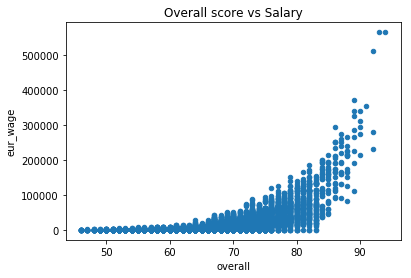

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
df.plot(x='overall', y='eur_wage', kind='scatter', title="Overall score vs Salary")

We try to use Linear Regression to detemine the salary base on the basic features Pace, Shot, Pass, Drift, Defense, Physical. 

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

In [9]:
X_train = train_set.drop('eur_wage',axis=1)
y_train = train_set['eur_wage']
X_test = test_set.drop('eur_wage',axis=1)
y_test = test_set['eur_wage']

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix

In [11]:
lin_reg = LinearRegression()
X = X_train[['potential','pac','sho','pas','dri','phy']]
lin_reg.fit(X,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
prediction = lin_reg.predict(X_test[['potential','pac','sho','pas','dri','phy']])
(prediction - y_test)*100/y_test

11361    -100.804814
4119     1114.297143
2008      -44.887498
9409      394.576300
4755      -69.630759
5562       -8.881099
1027      -62.048725
11499     -36.758117
11014     140.162487
14390      83.614648
16847    -641.391880
12395    -105.385665
9876      349.286777
8072      -49.508628
3889      570.698185
14007     295.674569
12599     256.112354
11825       2.006762
3910       79.257561
13001    -662.397602
1707       17.541032
450       -30.825863
3194       37.010039
17559   -2005.936855
5943      -40.873051
5564      258.140520
16006   -1151.298502
11845     -18.804817
12774     -33.007298
9068      430.022296
            ...     
12780       5.424870
13729      -0.452211
14919     323.323338
14738    -175.921989
8631       22.095762
11936     588.154065
15805   -2140.765621
4189      106.667807
8059       23.998497
568       -15.005679
11696     263.071035
6805        5.917470
3707      897.352256
15453    -345.214823
1957      -41.859810
16047    -550.764604
17081   -1074

It is clear that Linear Regression using only Pace, Shot, Pass, Drift, Defense, Physical features is not sufficient for correctly determining salary value.